   Age Sex  Exercise Hours Per Week  Sedentary Hours Per Day        BMI  \
0   67   1                 4.168189                 6.615001  31.251233   
1   21   1                 1.813242                 4.963459  27.194973   
2   21   0                 2.078353                 9.463426  28.176571   
3   84   1                 9.828130                 7.648981  36.464704   
4   66   1                 5.804299                 1.514821  21.809144   

   Smoking  Obesity  Alcohol Consumption  
0        1        0                    0  
1        1        1                    1  
2        0        0                    0  
3        1        0                    1  
4        1        1                    0  


C:\Users\Astolfo\AppData\Local\Temp\ipykernel_2216\4293785538.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Obesity'] = ((X['BMI'] > 30) & (X['Exercise Hours Per Week'] <= 8)).astype(int)


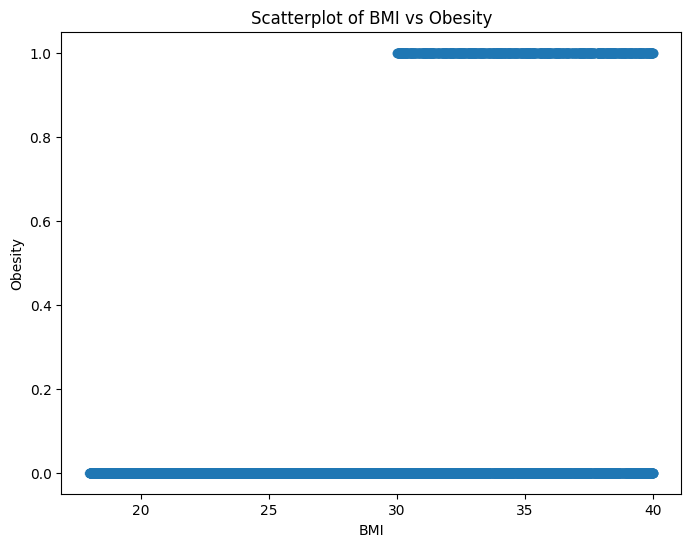

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dataset/dataset_l_fix.csv')

df = df[df['Sleep Hours Per Day'] != 0]
df.loc[:, 'Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})
df.loc[:, 'Diet'] = df['Diet'].map({'Unhealthy': 0, 'Average': 1, 'Healthy': 2})

Y=df['Heart Attack Risk']

X=df[['Age', 'Sex', 'Exercise Hours Per Week', 'Sedentary Hours Per Day', 'BMI', 'Smoking', 'Obesity', 'Alcohol Consumption']]

X['Obesity'] = ((X['BMI'] > 30) & (X['Exercise Hours Per Week'] <= 8)).astype(int)

plt.figure(figsize=(8, 6))
plt.scatter(X['BMI'], X['Obesity'], alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Obesity')
plt.title('Scatterplot of BMI vs Obesity')
plt.show()

In [27]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

smote = SMOTE()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

rf = RandomForestClassifier(n_estimators=250, max_depth=12, min_samples_split=4, min_samples_leaf=2, random_state=42)


rf.fit(X_train_smote, Y_train_smote)

print('Random Forest')
print('train set')
print(confusion_matrix(Y_train_smote, rf.predict(X_train_smote)))
print(classification_report(Y_train_smote, rf.predict(X_train_smote)))
print('test set')
print(confusion_matrix(Y_test, rf.predict(X_test)))
print(classification_report(Y_test, rf.predict(X_test)))

Random Forest
train set
[[3888  611]
 [1123 3376]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      4499
           1       0.85      0.75      0.80      4499

    accuracy                           0.81      8998
   macro avg       0.81      0.81      0.81      8998
weighted avg       0.81      0.81      0.81      8998

test set
[[838 287]
 [465 163]]
              precision    recall  f1-score   support

           0       0.64      0.74      0.69      1125
           1       0.36      0.26      0.30       628

    accuracy                           0.57      1753
   macro avg       0.50      0.50      0.50      1753
weighted avg       0.54      0.57      0.55      1753

